In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os

from train_utils import plot_confusion_matrix, make_dataframe
import tensorflow as tf
from tensorflow import keras
from keras import metrics
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
print("Tensorflow version is ", tf.__version__)

Tensorflow version is  1.13.1


Using TensorFlow backend.


## setup training

In [2]:
width_image = 224
height_image = 224
batch_size = 32
img_shape = (width_image, height_image, 3)

categories = os.listdir('dataset\\v2')
data_frames = make_dataframe('dataset\\v2', validation_percentage = 0.13, test_percentage=0.17)

train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
#    horizontal_flip=True,
#    vertical_flip=True,
#    rotation_range=15.
)
validation_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

Total size:  403
Training set size:  283
Validation set size:  53
Test set size:  67
Total size:  501
Training set size:  351
Validation set size:  66
Test set size:  84
Total size:  410
Training set size:  288
Validation set size:  54
Test set size:  68
Total size:  594
Training set size:  417
Validation set size:  78
Test set size:  99
Total size:  527
Training set size:  370
Validation set size:  69
Test set size:  88


In [3]:
# make generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe=data_frames[0],
    x_col='path',
    y_col='label',
    class_mode = 'categorical',
    target_size = (width_image, height_image),
    batch_size = batch_size)

validation_generator = validation_datagen.flow_from_dataframe(
    dataframe=data_frames[1],
    x_col = 'path',
    y_col = 'label',
    class_mode = 'categorical',
    target_size=(width_image, height_image),
    batch_size = batch_size,
    shuffle=False
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=data_frames[2],
    x_col = 'path',
    y_col = 'label',
    class_mode = 'categorical',
    target_size=(width_image, height_image),
    batch_size = batch_size,
    shuffle=False
)

Found 1709 validated image filenames belonging to 5 classes.
Found 320 validated image filenames belonging to 5 classes.
Found 406 validated image filenames belonging to 5 classes.


In [4]:
# get pre-trained MobileNet V2
#base_model = tf.keras.applications.MobileNetV2(input_shape=img_shape,
#                                                include_top=False,
#                                                weights='imagenet')

#base_model = tf.keras.applications.InceptionResNetV2(input_shape=img_shape,
#                                                include_top=False,
#                                                weights='imagenet')

base_model = tf.keras.applications.densenet.DenseNet121(input_shape=img_shape,
                                                include_top=False,
                                                weights='imagenet')

# feature extraction reuse, True for fine-tuning see tensorflow
base_model.trainable = False

Instructions for updating:
Colocations handled automatically by placer.


## create model over pre-trained net

In [5]:
# create model over pre-trained graph
model = tf.keras.Sequential([
    base_model,
#    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
#                       activation=tf.nn.relu, input_shape=(len(categories),)),
#    keras.layers.Dropout(0.5),
#    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
#                       activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(len(categories), activation='softmax')
])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [33]:
# add the optmizer, loss function and metric for evaluate the training
optimizer = keras.optimizers.Adam()
# optimizer = keras.optimizers.Nadam()
# optimizer = keras.optimizers.Adadelta()
# tensorflow guide use:
#optimizer = tf.keras.optimizers.RMSprop(lr=0.0001)

model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

## Tranining Phase

In [7]:
epochs = 100
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size
test_steps = test_generator.n // batch_size

history = model.fit_generator(
    train_generator,
    steps_per_epoch = steps_per_epoch,
    epochs = epochs, 
    validation_data = validation_generator,
    validation_steps = validation_steps
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
54/54 [==============================] - 26s 485ms/step - loss: 1.3631 - acc: 0.4547 - val_loss: 0.9935 - val_acc: 0.6031
Epoch 2/100
54/54 [==============================] - 18s 337ms/step - loss: 0.8230 - acc: 0.7045 - val_loss: 0.7259 - val_acc: 0.7250
Epoch 3/100
54/54 [==============================] - 18s 340ms/step - loss: 0.6154 - acc: 0.7970 - val_loss: 0.5906 - val_acc: 0.8062
Epoch 4/100
54/54 [==============================] - 18s 340ms/step - loss: 0.5339 - acc: 0.8215 - val_loss: 0.5489 - val_acc: 0.8000
Epoch 5/100
54/54 [==============================] - 18s 340ms/step - loss: 0.4929 - acc: 0.8280 - val_loss: 0.5104 - val_acc: 0.8344
Epoch 6/100
54/54 [==============================] - 18s 341ms/step - loss: 0.4370 - acc: 0.8525 - val_loss: 0.4464 - val_acc: 0.8438
Epoch 7/100
54/54 [==============================] - 19s 344ms/step - loss: 0.4041 - acc: 0.8613 - val_loss: 0.4035 - val_acc: 0.8750
Epoch 8/100
54

Epoch 76/100
54/54 [==============================] - 19s 344ms/step - loss: 0.1241 - acc: 0.9579 - val_loss: 0.3183 - val_acc: 0.8938
Epoch 77/100
54/54 [==============================] - 18s 342ms/step - loss: 0.1266 - acc: 0.9602 - val_loss: 0.3281 - val_acc: 0.8875
Epoch 78/100
54/54 [==============================] - 19s 343ms/step - loss: 0.1201 - acc: 0.9661 - val_loss: 0.3251 - val_acc: 0.9094
Epoch 79/100
54/54 [==============================] - 18s 342ms/step - loss: 0.1355 - acc: 0.9549 - val_loss: 0.3126 - val_acc: 0.8969
Epoch 80/100
54/54 [==============================] - 19s 346ms/step - loss: 0.1163 - acc: 0.9643 - val_loss: 0.3180 - val_acc: 0.8875
Epoch 81/100
54/54 [==============================] - 18s 342ms/step - loss: 0.1277 - acc: 0.9614 - val_loss: 0.3328 - val_acc: 0.8844
Epoch 82/100
54/54 [==============================] - 18s 342ms/step - loss: 0.1160 - acc: 0.9655 - val_loss: 0.3568 - val_acc: 0.8844
Epoch 83/100
54/54 [==============================] - 1

## Fine tuning

In [ ]:
#Enable chage of all net weight's including the pre-trained
epochs_fine = 100
model.trainable = True
print("Number of layers in the base model: ", len(base_model.layers))

In [ ]:
# set the level to fine-tune
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable =  False

In [ ]:
# recompile model with optimizer
optimizer = keras.optimizers.SGD(lr=0.0001, momentum=0.9, nesterov=True)
#optimizer = tf.keras.optimizers.RMSprop(lr=2e-5)

model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

In [ ]:
# fit fine-tuning
history_fine = model.fit_generator(train_generator,
                                   steps_per_epoch = steps_per_epoch,
                                   epochs = epochs_fine,
                                   validation_data=validation_generator,
                                   validation_steps=validation_steps)

## Plotting Validation accuracy/loss

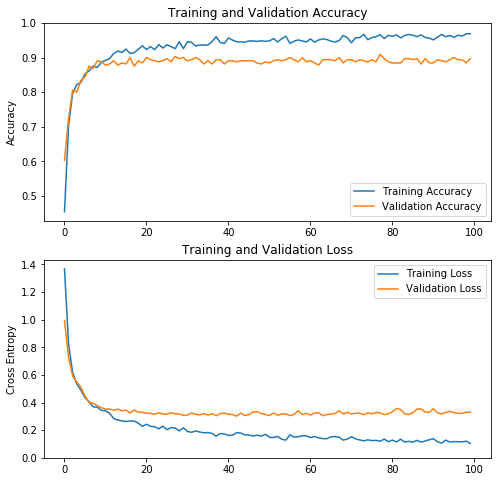

In [8]:
%matplotlib inline

# training and validation accuracy/loss
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

## Plotting confusion matrix

Confusion Matrix
[[62  0  0  5  0]
 [ 0 71  2  0 11]
 [ 1  6 53  0  8]
 [ 4  0  0 94  1]
 [ 3  5  2  1 77]]
Classification Report
              precision    recall  f1-score   support

   cardboard       0.89      0.93      0.91        67
       glass       0.87      0.85      0.86        84
       metal       0.93      0.78      0.85        68
       paper       0.94      0.95      0.94        99
     plastic       0.79      0.88      0.83        88

    accuracy                           0.88       406
   macro avg       0.88      0.87      0.88       406
weighted avg       0.88      0.88      0.88       406

406/406 [==============================] - 5s 12ms/sample - loss: 0.3716 - acc: 0.8793
Accuracy: 87.9%
Loss: 37.2%


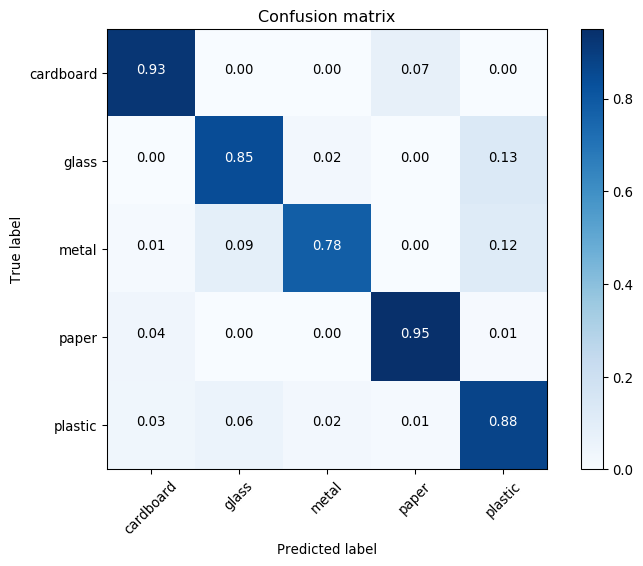

In [19]:
# confusion matrix
Y_pred = model.predict_generator(test_generator, test_steps)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))

# classification report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=categories))

# evaluate keras model with model.evaluate()
x, y = zip(*(test_generator[i] for i in range(len(test_generator))))
x_test, y_test = np.vstack(x), np.vstack(y)
loss, acc = model.evaluate(x_test, y_test, batch_size=32)

print("Accuracy: {0:0.1f}%".format(acc * 100))
print("Loss: {0:0.1f}%".format(loss * 100))


plot_confusion_matrix(test_generator.classes, y_pred, categories)